<a href="https://colab.research.google.com/github/adarshnitt/Deep-Learning/blob/main/Potatao_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> **Potatao Disease Classification- a Kaggle task** </h1>
Dataset: muhammadardiputra/potato-leaf-disease-dataset | Kaggle

<h3>Data Loading </h3>

In [2]:
# we will use data from Kaggle, so fist match colab and Kaggle
! pip install -q kaggle  # q : quit no verbose 

In [3]:
# downloading token from kaggle and saving in local computer then importing at new dir (~/.kaggle)
# path for token: Kaggle=>Account=>API_Token
from google.colab import files
files.upload()
# data will go to content section firstly

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarshnitt","key":"6d32d5af10db0f45742b74aaa798b5e9"}'}

In [4]:
# imported data from kaggle to g-cloud in directory ~/.kaggle
! mkdir ~/.kaggle  # ~ home dir

In [5]:
# moving file kaggle.json to our new dir(~/.kagle)
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
! cp kaggle.json ~/.kaggle/

In [6]:
# lets see how many datasets are freely available in kaggle
! kaggle datasets list # getting info about all datasets.

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18401  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11067  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5643  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3920  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [7]:
# securing our kaggle api 
! chmod 600 ~/.kaggle/kaggle.json
#  chmos to 600 means only owner can read and write access of directory ~/.kaggle/kaggale.json.

In [8]:
# m-1 to attach data in our newly built directory 
! kaggle competion download -c kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset
# Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
#  chmos to 600 means only owner can read and write access of directory ~/.kaggle/kaggale.json.

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'competion' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [9]:
# downloading data at content/our_data
! kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset
# -d is same as -v(verbosity)

 36% 9.00M/25.2M [00:00<00:00, 86.1MB/s]
100% 25.2M/25.2M [00:00<00:00, 120MB/s] 


In [10]:
# importing libraries
import pandas as pd
import numpy as np

In [11]:
# unzipping zip data file
! unzip "/content/potato-leaf-disease-dataset.zip"

Archive:  /content/potato-leaf-disease-dataset.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c__

In [12]:
import pandas as pd
import numpy as np
#! pip install  tensorflow-gpu
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
# listing dir in test data
os.listdir("/content/Potato/Test") 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
# no of images in each dir of test data
def info(d1):
  for samp in os.listdir(d1):
    subsamp=os.path.join(d1,samp)
    l=len(os.listdir(subsamp))
    print(l, " and samp type is -",samp,"***",d1[-5:])
  pass

In [15]:
info("/content/Potato/Valid")

100  and samp type is - Potato___Early_blight *** Valid
100  and samp type is - Potato___Late_blight *** Valid
100  and samp type is - Potato___healthy *** Valid


In [16]:
info("/content/Potato/Train")

300  and samp type is - Potato___Early_blight *** Train
300  and samp type is - Potato___Late_blight *** Train
300  and samp type is - Potato___healthy *** Train


In [17]:
# practice notes
"""
import os
import shutil
shutil.rmtree("/content/Potato/Train/new_train")
os.mkdir()
os.rmdir()
# to move a dqata from one folder to anothwr
os.listdir("")
os.path.join(a,b) : give a returned path
random.choice(): choose randomly any one from given data.
"""

'\nimport os\nimport shutil\nshutil.rmtree("/content/Potato/Train/new_train")\nos.mkdir()\nos.rmdir()\n# to move a dqata from one folder to anothwr\nos.listdir("")\nos.path.join(a,b) : give a returned path\nrandom.choice(): choose randomly any one from given data.\n'

<h1> Preprocessing </h1>


In [18]:
# real time image augmentation: scaling, shearing,rotaion etc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_train(path):
  "for train image"
  " return dsiectory with data as x and truths as y"
  model=ImageDataGenerator(rotation_range=360,
                           shear_range=10, # angular ration float
                           zoom_range=0.3, # % zoom augmentation
                           rescale=1/255,  # rescaling (0-1)
                           horizontal_flip=True,
                           vertical_flip=True)
  # generating batches of augmenting data
  image=model.flow_from_directory(path,
                                  target_size=(224,224), # output augmented image shape 
                                  class_mode="binary",
                                  batch_size=20)
  return image

In [19]:
# first read image then show image. Dont go directly to show image.
def show(dir,index):
  comp=os.listdir(dir)
  new=os.path.join(dir,comp[index])
  data=os.listdir(new)
  print(len(data))
  plt.subplots(3,3,figsize=(8,8))
  for i in range(len(data)):
    plt.subplot(3,3,i+1)
    p3=os.path.join(new,data[i])
    i1=plt.imread(p3)
    plt.imshow(i1)
    if i >=8:
      break
  pass  

100


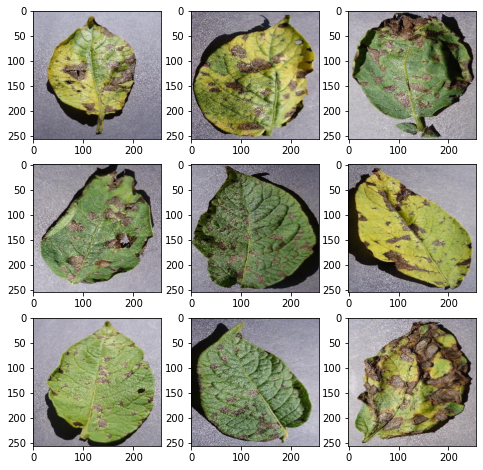

In [20]:
# testing infected photos
show("/content/Potato/Test",0)

100


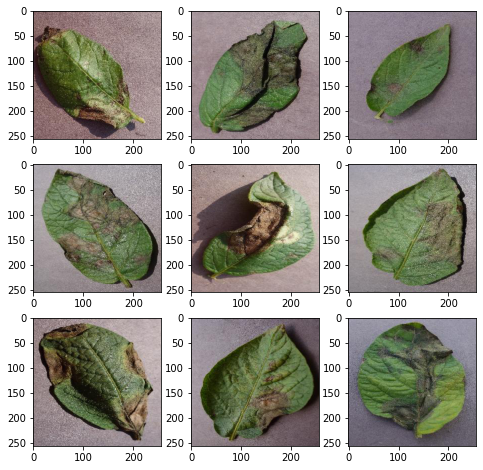

In [21]:
# testing late blight photos
show("/content/Potato/Valid",1)

In [22]:
def augment_val(path):
  " for validation data"
  model=ImageDataGenerator(rescale=1/255)
  img=model.flow_from_directory(directory=path,
                                target_size=(224,224),
                                batch_size=20,
                                class_mode="binary")
  return img

100


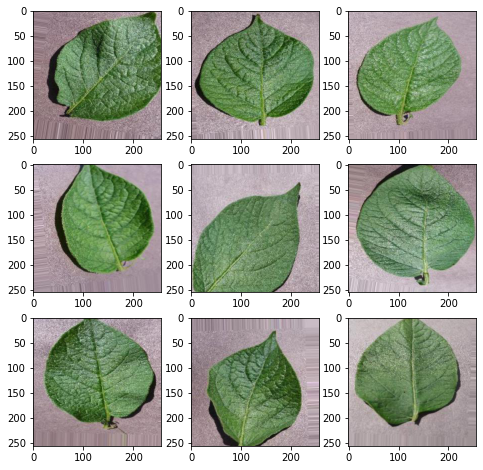

In [23]:
# testing healthy photos
show("/content/Potato/Valid",2)

In [24]:
data_train_augment=augment_train("/content/Potato/Train")
data_val_augment=augment_val("/content/Potato/Valid")

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [25]:
# class indices of each data in data folder
print(data_train_augment.class_indices)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [26]:
print(data_val_augment.class_indices)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [27]:
from tensorflow.keras import layers,models
from keras import Sequential

<h1> Model Building</h1>

In [28]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array

<h1> CNN</h1>

In [29]:
# Note: keras work with batches of image (Image_in _one_batch, 224,224,3)
model=Sequential()
# input shape is x then output will be ((x-f+2p)/s)+1.
# input data in CNN (Batch_size_Count, red,gren,blue) i.e (None,224,224,3) or (100,224,224,3)
model.add(Conv2D(filters=16,  #  16 specific feature based filters
                 kernel_size=(2,2), # filter size
                 activation="relu",
                 padding="same",  # final size will same as input
                 input_shape=(224,224,3)))  # input image shape
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # overfitting avoid use maxpol
model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))  # 20% nodes are cold
model.add(Flatten())
model.add(Dense(units=64,
                activation="relu"))  # dense neural nn with 64 activation nodes
model.add(Dropout(rate=0.3))
model.add(Dense(units=1,
                activation="sigmoid"))

In [30]:
model.summary()
# input must be of shape(unknown, 224,224,3) unknown is batch images no 
# do it by np.expand_dims(img_array,axis=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 55, 55, 64)        0

In [31]:
# compiling the model
model.compile(optimizer="adam",loss=keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

<h1> Model Trainig </h1>

In [35]:
# early stopping and model check point  to save our resources use limitly.
from keras.callbacks import ModelCheckpoint,EarlyStopping
#earlystopping : when model performance stopped improving
es=EarlyStopping(monitor="val_accuracy",  # quantity monitor if not changing with min_delta upto patience no then early stop, dont waste computationl resources.
                 min_delta=0.1,
                 patience=15,
                 verbose=1,
                 restore_best_weights=True # best  waits till point will be in record
                 )
# model saving : making checkpoints by saving tunable weights
# saving best trained model till point
mc=ModelCheckpoint(filepath="/content/bestmodel.h5", # used to store huge amount of numerical data in binary format, here store model metadata in.h5 format.
                   monitor="val_accuracy",
                   save_best_only=True,
                   save_weights_only=False,
                   )
tune=[es,mc]

In [39]:
# training model start
# note: model.fit_generator used when dataset is huge, source data is augmenting whie not possible in model.fit case.
# epoch: no of times learning algo will run with traing dataset to train model
histry=model.fit_generator(generator=data_train_augment, #(input,targets) traing data things
                           validation_data=data_val_augment,
                           epochs=300,
                           steps_per_epoch=25, # total data set/ no of batch size
                           verbose=1,
                           callbacks=tune) # list of  callbacks functions applied during traing 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/300
25/25 [==============================] - 8s 338ms/step - loss: -350795904.0000 - accuracy: 0.3540 - val_loss: -398432576.0000 - val_accuracy: 0.3633
Epoch 2/300
25/25 [==============================] - 8s 333ms/step - loss: -398046560.0000 - accuracy: 0.3660 - val_loss: -412147456.0000 - val_accuracy: 0.3633
Epoch 3/300
25/25 [==============================] - 8s 333ms/step - loss: -396122400.0000 - accuracy: 0.3660 - val_loss: -423028960.0000 - val_accuracy: 0.3633
Epoch 4/300
25/25 [==============================] - 8s 329ms/step - loss: -384637760.0000 - accuracy: 0.3560 - val_loss: -434606560.0000 - val_accuracy: 0.3633
Epoch 5/300
25/25 [==============================] - 8s 331ms/step - loss: -451492384.0000 - accuracy: 0.3580 - val_loss: -446030848.0000 - val_accuracy: 0.3633
Epoch 6/300
25/25 [==============================] - 8s 331ms/step - loss: -427951552.0000 - accuracy: 0.3700 - val_loss: -460345248.0000 - val_accuracy: 0.3633
Epoch 7/300
25/25 [===============

Model Analysis


In [40]:
log1=histry.history  # histry is our model fitting var
log1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
log1["loss"]

[-350795904.0,
 -398046560.0,
 -396122400.0,
 -384637760.0,
 -451492384.0,
 -427951552.0,
 -414889408.0,
 -338391872.0,
 -392844256.0,
 -445877856.0,
 -441627520.0,
 -503649728.0,
 -518834752.0,
 -575080384.0,
 -597287488.0,
 -618297536.0]

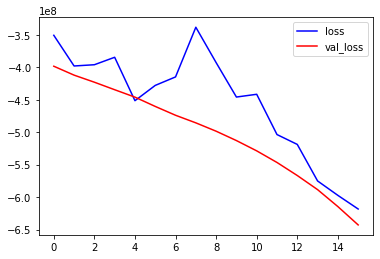

In [42]:
import matplotlib.pyplot as plt
plt.plot(log1["loss"],"b")
plt.plot(log1["val_loss"],"r")
plt.legend(["loss","val_loss"])


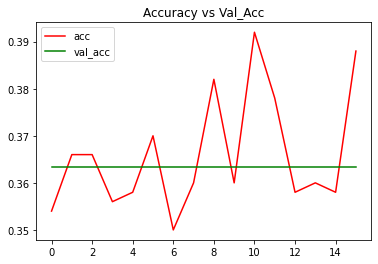

In [43]:
plt.plot(log1["accuracy"],"r")
plt.plot(log1["val_accuracy"],"g")
plt.title("Accuracy vs Val_Acc")
plt.legend(["acc","val_acc"])

Prediction

In [44]:
trained_model="/content/bestmodel.h5"
from keras.models import load_model

In [45]:
model=load_model(trained_model)

In [46]:
# model.evalute_generator : it is same as model.predict_generator but it give some analysis comparable info.
test_p="/content/Potato/Test"
test_data=augment_train(test_p)
pred=model.evaluate_generator(test_data) # loss ,accuracy


Found 300 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


In [47]:
[loss,accur]=pred
print("loss of test data is -",loss, "accuracy of input data is:-",accur)  

loss of test data is - -988508736.0 accuracy of input data is:- 0.38333332538604736


Images

In [48]:
p11="/content/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG"


In [49]:
# m-1
import PIL as lab
img_array=np.array(lab.Image.open(p11).resize((224,224)))
img_array.shape  # un normalized data (x/255)

(224, 224, 3)

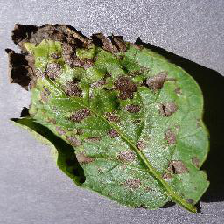

In [50]:
# m-2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img=load_img(p11,target_size=(224,224))
img_array=img_to_array(img)/255  # normalized data
img


In [51]:
img_array # normalized /255

array([[[0.72156864, 0.7176471 , 0.77254903],
        [0.7490196 , 0.74509805, 0.8       ],
        [0.7647059 , 0.7607843 , 0.8156863 ],
        ...,
        [0.627451  , 0.62352943, 0.69411767],
        [0.54509807, 0.5411765 , 0.6117647 ],
        [0.5176471 , 0.5137255 , 0.58431375]],

       [[0.75686276, 0.7529412 , 0.80784315],
        [0.8039216 , 0.8       , 0.85490197],
        [0.8235294 , 0.81960785, 0.8745098 ],
        ...,
        [0.61960787, 0.6156863 , 0.6862745 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.57254905, 0.5686275 , 0.6392157 ]],

       [[0.70980394, 0.7058824 , 0.7607843 ],
        [0.7372549 , 0.73333335, 0.7882353 ],
        [0.7490196 , 0.74509805, 0.8       ],
        ...,
        [0.60784316, 0.6039216 , 0.6745098 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.58431375, 0.5803922 , 0.6509804 ]],

       ...,

       [[0.63529414, 0.627451  , 0.68235296],
        [0.6392157 , 0.6313726 , 0.6862745 ],
        [0.63529414, 0

testing our img: img_array

In [52]:
# input shape of image must be in batch order (n_images_no, 224,224,3)
final_array=np.expand_dims(img_array,axis=0)
final_array.shape    # batch shape img( None, 224,224,3)

(1, 224, 224, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


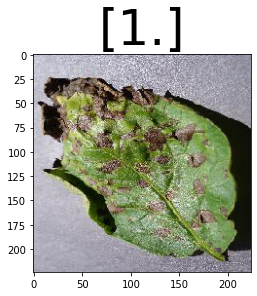

In [53]:
result=model.predict(final_array);
plt.imshow(img);
plt.title(result[0],fontsize=50);

In [54]:
# no of categories:
info("/content/Potato/Valid")

100  and samp type is - Potato___Early_blight *** Valid
100  and samp type is - Potato___Late_blight *** Valid
100  and samp type is - Potato___healthy *** Valid


Testing more images

In [55]:
# framing a function to predict
def final_predict(path):
  img=load_img(path,target_size=(224,224))
  img_arr=img_to_array(img)
  fin=np.expand_dims(img_arr,axis=0)
  out=model.predict(fin)
  plt.imshow(img)
  plt.title(out[0])
  pass

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


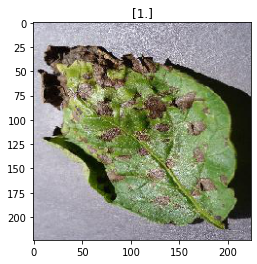

In [56]:
final_predict(p11)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


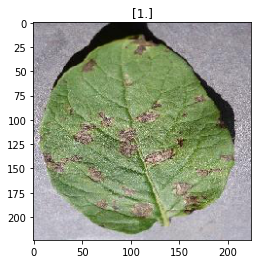

In [57]:
path="/content/Potato/Test/Potato___Early_blight/12826416-efc5-49d3-b615-731629c95435___RS_Early.B 7215.JPG"
final_predict(path)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


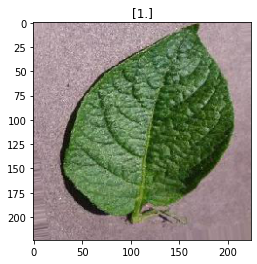

In [58]:
path="/content/Potato/Test/Potato___healthy/Potato_healthy-27-_0_9917.jpg"
final_predict(path)

In [59]:
# model accuracy is poor. I have to improve its performance.

<h1> Method-2: Prediction using Transfer Learning</h1>
training data:data_train_augment <br>
val_data: data_val_augment<br>
test_data: test_data

In [60]:
# class indices in our train data
data_train_augment.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [61]:
# pretrained model 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from keras.models import load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
# preprocesssing_input do zero centre data without rescaling.
# preprocess_input(img_array) make data in range(0,1)

In [62]:
# converting image to array (0,255)
i1=load_img("/content/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG")
a1=img_to_array(i1)
a1

array([[[184., 183., 197.],
        [191., 190., 204.],
        [195., 194., 208.],
        ...,
        [160., 159., 177.],
        [139., 138., 156.],
        [132., 131., 149.]],

       [[193., 192., 206.],
        [205., 204., 218.],
        [210., 209., 223.],
        ...,
        [158., 157., 175.],
        [143., 142., 160.],
        [146., 145., 163.]],

       [[181., 180., 194.],
        [188., 187., 201.],
        [191., 190., 204.],
        ...,
        [155., 154., 172.],
        [143., 142., 160.],
        [149., 148., 166.]],

       ...,

       [[162., 160., 174.],
        [163., 161., 175.],
        [162., 160., 174.],
        ...,
        [111., 107., 121.],
        [137., 133., 147.],
        [128., 124., 138.]],

       [[163., 161., 175.],
        [165., 163., 177.],
        [165., 163., 177.],
        ...,
        [145., 141., 155.],
        [135., 131., 145.],
        [136., 132., 146.]],

       [[172., 170., 184.],
        [172., 170., 184.],
        [173., 1

In [63]:
# example of preprocess input.
preprocess_input(a1)   # converting img_array into(0,1)

array([[[ 0.4431373 ,  0.43529415,  0.54509807],
        [ 0.49803925,  0.4901961 ,  0.6       ],
        [ 0.5294118 ,  0.52156866,  0.6313726 ],
        ...,
        [ 0.254902  ,  0.24705887,  0.38823533],
        [ 0.09019613,  0.082353  ,  0.22352946],
        [ 0.03529418,  0.02745104,  0.1686275 ]],

       [[ 0.5137255 ,  0.5058824 ,  0.6156863 ],
        [ 0.60784316,  0.6       ,  0.70980394],
        [ 0.64705884,  0.6392157 ,  0.7490196 ],
        ...,
        [ 0.23921573,  0.2313726 ,  0.37254906],
        [ 0.12156868,  0.11372554,  0.254902  ],
        [ 0.14509809,  0.13725495,  0.27843142]],

       [[ 0.41960788,  0.41176474,  0.52156866],
        [ 0.47450984,  0.4666667 ,  0.5764706 ],
        [ 0.49803925,  0.4901961 ,  0.6       ],
        ...,
        [ 0.21568632,  0.20784318,  0.34901965],
        [ 0.12156868,  0.11372554,  0.254902  ],
        [ 0.1686275 ,  0.16078436,  0.30196083]],

       ...,

       [[ 0.27058828,  0.254902  ,  0.36470592],
        [ 0

<h1>data prep for  transfer learning model </h1>

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# data augmentation
def augment(path):
  "input: train path"
  "output: preprocess data"
  " return dsiectory with data as x and truths as y"
  augmented_img=ImageDataGenerator(zoom_range=0.2,
                                   shear_range=10,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function=preprocess_input # it will automatically rescale data with (0,1)
                                   )
  final_directory_augment=augmented_img.flow_from_directory(directory=path,
                                                            target_size=(224,224),
                                                            batch_size=32,
                                                            class_mode="binary",
                                                            )
  return final_directory_augment

In [65]:
train_data=augment("/content/Potato/Train")

Found 900 images belonging to 3 classes.


In [66]:
def augment(path):
  "input: val path"
  "output: augmented datset"
  img=ImageDataGenerator(preprocessing_function=preprocess_input) 
  augment_img=img.flow_from_directory(directory=path,
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode="binary")
  return augment_img

In [67]:
val_data=augment("/content/Potato/Valid")

Found 300 images belonging to 3 classes.


In [68]:
val_data

In [69]:
test_data=augment("/content/Potato/Test")

Found 300 images belonging to 3 classes.


In [70]:
def show(path,index):
  n=os.listdir(path)
  n1=os.path.join(path,n[index])
  data=os.listdir(n1)
  plt.subplots(2,2,figsize=(10,10))
  for i in range(len(data)):
    plt.subplot(2,2,i+1)
    m=os.path.join(n1,data[i])
    arr=plt.imread(m)
    plt.imshow(arr)
    if i>2:
      break
  pass

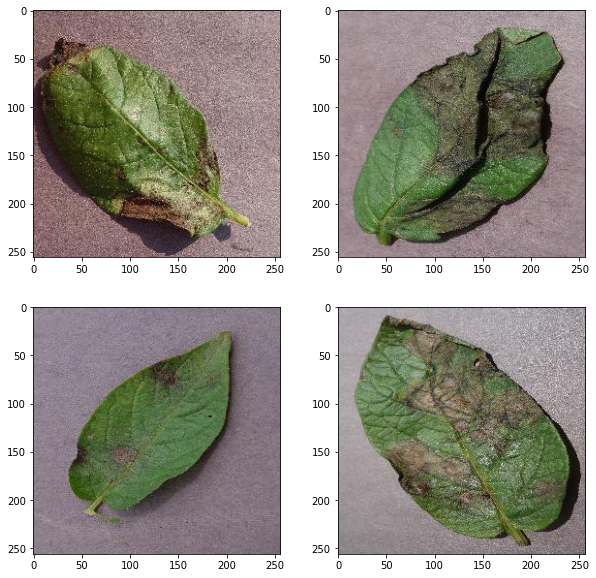

In [71]:
show("/content/Potato/Valid",1)

<h1> MobileNet- Transfer Learning </h1>

In [72]:
from keras.applications.mobilenet import MobileNet
from tensorflow.keras import Model # to merge input with output
import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import  ModelCheckpoint

In [73]:
# Our imported pretrained model
half_model=MobileNet(input_shape=(224,224,3),
                include_top=False # fully connected prediction layer will not loaded only feature extraction model except prediction model will be loaded.
                )
# only feature extraction layers. Exclude prediction layer model.

17235968/17225924 [==============================] - 0s 0us/step


In [74]:
for layer in half_model.layers:
  print(layer)

In [75]:
full_model=MobileNet(input_shape=(224,224,3),
             include_top=True)
# getting all layers of model including prediction layer.
# GlobalAverage=> Pooling=>Droupout=>Activation.

17235968/17225924 [==============================] - 0s 0us/step


In [76]:
for i in full_model.layers:
  print(i)

In [77]:
# making all layers of trainable to false. Pretrained weights will accepted 
for layer in half_model.layers:
  layer.trainable=False
# when I will train this model, these imported layers will not be trained only new added layers will train.
# these layers will accepted , no need to train them again.

In [78]:
half_model.summary()
# at bottom  see trainable parameters are 0.

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [79]:
out_layer=half_model.output # return output of half_model by last layer
# we will add prediction layer after this output layers.
out_layer

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [80]:
#checking output layer shape
out_layer.shape

TensorShape([None, 7, 7, 1024])

In [81]:
# new_layer_name=Flatten()(Layer.call) # layer.call will  call old Layer
new_layer1=Flatten()(out_layer) # after out layer, a Flatten Layer is added
new_layer2=Dense(units=1,activation="sigmoid")(new_layer1) # new_layer2 will call new_layer1  

# half_model_layers+Flatten_layer+Dense_layer

In [82]:
half_model.input # about input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [83]:
#Fresh_model=Model(input, output) : Input: inputs , output: out layers of the model
# Model(): group layers into an object




from keras.models import Model
fresh_model=Model(half_model.input,new_layer2)

In [84]:
fresh_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [85]:
# model compilation
import tensorflow 
fresh_model.compile(optimizer="rmsprop",
                    loss=keras.losses.binary_crossentropy,
                    metrics=["accuracy"])

In [86]:
# modelCheckpoints
# earlyStop :if progress in optimization is not good
es=EarlyStopping(monitor="val_accuracy",
                 min_delta=0.1,
                 patience=10,
                 verbose=1,
                 restore_best_weights=True)
# model checkppints: track model progress and storing model weights at interval
mc=ModelCheckpoint("/content/transfer_model.h5",
                   monitor="val_accuracy",
                   verbose=1,
                   save_best_only=True)  # h5 is binary way to store data
cp=[es,mc]

In [104]:
my_model=fresh_model.fit(x=train_data, # train datagenerator will give u x along with truth walue y.
                epochs=320,  # times algo run over same data
                callbacks=cp,
                validation_data=val_data,
                steps_per_epoch=10,  # how many data batches will try under 1 epoch
                 #number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                )

Epoch 1/320
10/10 [==============================] - ETA: 0s - loss: -8011.3853 - accuracy: 0.4075
Epoch 00001: val_accuracy improved from 0.38667 to 0.41333, saving model to /content/transfer_model.h5
10/10 [==============================] - 6s 561ms/step - loss: -8011.3853 - accuracy: 0.4075 - val_loss: -8018.8208 - val_accuracy: 0.4133
Epoch 2/320
10/10 [==============================] - ETA: 0s - loss: -8205.6670 - accuracy: 0.4110
Epoch 00002: val_accuracy did not improve from 0.41333
10/10 [==============================] - 5s 555ms/step - loss: -8205.6670 - accuracy: 0.4110 - val_loss: -8045.1450 - val_accuracy: 0.4100
Epoch 3/320
10/10 [==============================] - ETA: 0s - loss: -7484.1851 - accuracy: 0.4315
Epoch 00003: val_accuracy did not improve from 0.41333
10/10 [==============================] - 5s 502ms/step - loss: -7484.1851 - accuracy: 0.4315 - val_loss: -8068.7061 - val_accuracy: 0.4067
Epoch 4/320
10/10 [==============================] - ETA: 0s - loss: -814

In [105]:
train_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [106]:
k=my_model.history
k.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [113]:
k["loss"]

[-8011.38525390625,
 -8205.6669921875,
 -7484.18505859375,
 -8145.6416015625,
 -6955.1484375,
 -8450.5341796875,
 -7952.91943359375,
 -7989.22900390625,
 -8883.7900390625,
 -8264.36328125,
 -7988.4638671875]

Text(0.5, 1.0, 'Losses *')

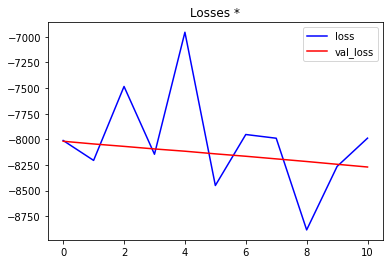

In [110]:
plt.plot(k["loss"],"b")
plt.plot(k["val_loss"],"r")
plt.legend(["loss","val_loss"])
plt.title("Losses *")

Text(0.5, 1.0, 'Accuracy *')

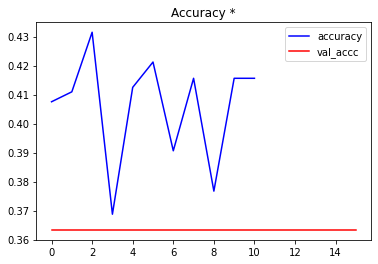

In [111]:
plt.plot(k["accuracy"],"b")
plt.plot(log1["val_accuracy"],"r")
plt.legend(["accuracy","val_accc"])
plt.title("Accuracy *")